### 선형회귀

9.1 단순선형회귀   
9.2 다중선형회귀

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import MinMaxScaler
path = 'data/house-prices-advanced-regression-techniques'
train_path = path + '/train.csv'
test_path = path + '/test.csv'
test_target_path = path+'/sample_submission.csv'

df = pd.read_csv(train_path,na_values=['NA', 'NaN', 'NULL', 'none','NA          ','NA         '])
df_t = pd.read_csv(test_path,na_values=['NA', 'NaN', 'NULL', 'none','NA          ','NA         '])
y_test = pd.read_csv(test_target_path)
y_test.columns = y_test.columns.str.strip()
y_test = y_test.drop(labels = 'Id', axis = 1)

# 열 이름에서 공백 제거
df.columns = df.columns.str.strip()
df_t.columns = df_t.columns.str.strip()
isna=  df.isna().sum()
isna_test = df_t.isna().sum()
df_t['BsmtUnfSF'] = pd.to_numeric(df['BsmtUnfSF'], errors='coerce')


# 의미없어보이는 데이터 제거
df = df.drop(columns='MiscFeature')
df_t = df_t.drop(columns='MiscFeature')

# 숫자형 결측값 채우기
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df.fillna(df[numeric_columns].mean(), inplace=True)
isna = df.isna().sum()

test_numeric_col = df_t.select_dtypes(include=['float64', 'int64']).columns
df_t.fillna(df[test_numeric_col].mean(), inplace=True)
isna_test = df_t.isna().sum()

# 범주형 데이터 결측값 채우기
object_col = df.select_dtypes(include=['object']).columns
# 각 범주형 열에 대해 최빈값으로 결측값 채우기
for col in object_col:
    # 최빈값을 계산하고 첫 번째 최빈값을 사용
    df[col].fillna(df[col].mode()[0], inplace=True)
    df_t[col].fillna(df[col].mode()[0], inplace = True)
isna = df.isna().sum()
isna_test = df_t.isna().sum()

df_encorded = pd.get_dummies(df.select_dtypes(include = 'object'))
df_preprocessed = pd.concat([df[numeric_columns], df_encorded], axis = 1)

df_t_encorded = pd.get_dummies(df_t.select_dtypes(include='object'))
df_t_preprocessed = pd.concat([df_t[test_numeric_col], df_t_encorded ], axis = 1)
df_t_preprocessed = df_t_preprocessed.reindex(columns=df_preprocessed.columns, fill_value = 0)

scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
y = df['SalePrice'].values.reshape(-1,1)
y = target_scaler.fit_transform(y)
y_test = y_test.values.reshape(-1,1)
y_test = target_scaler.transform(y_test)
train = df_preprocessed.drop(labels='SalePrice', axis = 1)
train = train.drop(labels="Id", axis = 1)
train = scaler.fit_transform(train)
test = df_t_preprocessed.drop(labels=  ['Id','SalePrice'], axis = 1)
test = scaler.transform(test)
print(df_preprocessed.shape, df_t_preprocessed.shape)


import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(293,40)
        self.fc2 = nn.Linear(40, 20)
        self.fc3 = nn.Linear(20, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout( p=0.7)

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.dropout(out)
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out
            
# train = train.to_numpy().astype('float32')
# y = y.to_numpy().astype('float32')
# test = test.to_numpy().astype('float32')
test = torch.tensor(test)
# y_test = y_test.to_numpy().astype('float32')
y_test = torch.tensor(y_test)
train = torch.tensor(train, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)
test = torch.tensor(test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

train_dataset = torch.utils.data.TensorDataset(train, y)
test_dataset = torch.utils.data.TensorDataset(test, y_test)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True,batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle =True, batch_size = 64 )

(1460, 295) (1459, 295)


/var/folders/yp/vp1ybtwd7dg99p8q67djzx_w0000gn/T/ipykernel_30218/2244609173.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/yp/vp1ybtwd7dg99p8q67djzx_w0000gn/T/ipykernel_30218/2244609173.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

MLP(
  (fc1): Linear(in_features=293, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.7, inplace=False)
)
Epoch [1 / 330], Loss : 0.0067
Epoch [2 / 330], Loss : 0.0136
Epoch [3 / 330], Loss : 0.0082
Epoch [4 / 330], Loss : 0.0083
Epoch [5 / 330], Loss : 0.0028
Epoch [6 / 330], Loss : 0.0048
Epoch [7 / 330], Loss : 0.0044
Epoch [8 / 330], Loss : 0.0024
Epoch [9 / 330], Loss : 0.0171
Epoch [10 / 330], Loss : 0.0029
Epoch [11 / 330], Loss : 0.0025
Epoch [12 / 330], Loss : 0.0085
Epoch [13 / 330], Loss : 0.0056
Epoch [14 / 330], Loss : 0.0020
Epoch [15 / 330], Loss : 0.0029
Epoch [16 / 330], Loss : 0.0029
Epoch [17 / 330], Loss : 0.0014
Epoch [18 / 330], Loss : 0.0026
Epoch [19 / 330], Loss : 0.0024
Epoch [20 / 330], Loss : 0.0047
Epoch [21 / 330], Loss : 0.0020
Epoch [22 / 330], Loss : 0.0013
Epoch [23 / 330], Loss : 0.0015
Epoch [24 / 330], Loss : 0

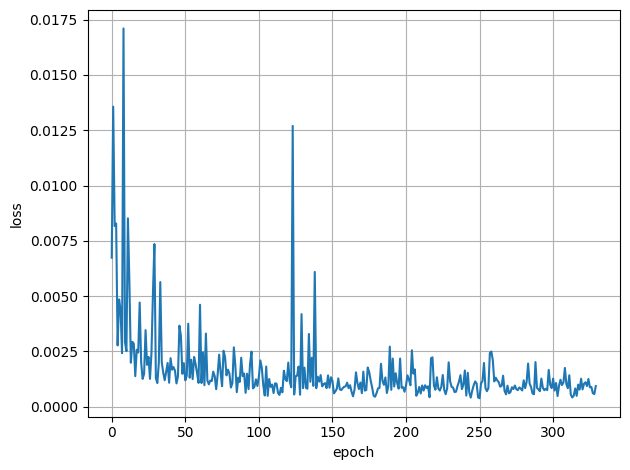

In [7]:
import matplotlib.pyplot as plt


lr = 0.001
epochs = 330

model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr= lr)
print(model)

model.train()
l=[]
for epoch in range(epochs):

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l.append(loss.item())
    if epoch % 10 ==0:
        print(f'Epoch [{epoch+1} / {epochs}], Loss : {loss.item():.4f}')

plt.plot(range(epochs), l)
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.tight_layout()
plt.show()



In [8]:
model.eval()

test_loss = 0.0
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.append(outputs.detach().numpy())
        actuals.append(targets.numpy())
        loss = criterion(outputs, targets.unsqueeze(1))
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f" test loss: {test_loss:.4f}")

 test loss: 0.0025


/Users/youngki/.pyenv/versions/3.9.18/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/youngki/.pyenv/versions/3.9.18/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([51, 1, 1])) that is different to the input size (torch.Size([51, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

actuals = np.concatenate(actuals, axis = 0)
predictions = np.concatenate(predictions, axis = 0)
actuals_reshape  = actuals.reshape(-1,1)
predictions_reshape = predictions.reshape(-1,1)
actual = target_scaler.inverse_transform(actuals_reshape)
prediction = target_scaler.inverse_transform(predictions)

 실제 값 오차 : 32720.99 
 평균 오차 :  18.26% 
 5퍼센트 오차 비율 : 32.899246058944485%


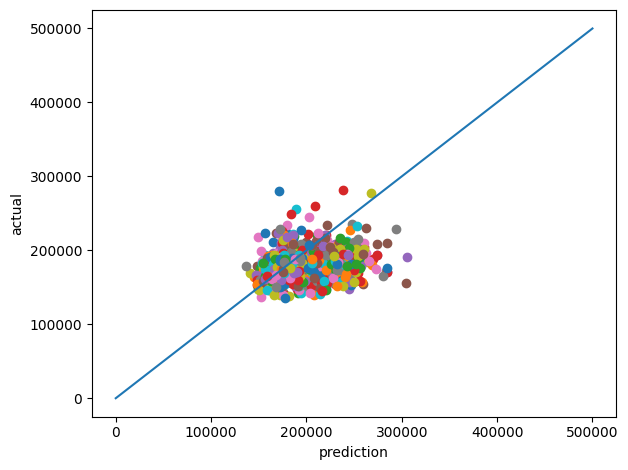

In [11]:
mse_l = []
plt.plot([0,500000],[0,500000])
count = 0
for i in range(len(prediction)):
    plt.scatter(prediction[i], actual[i])
    mse_l.append((prediction[i] - actual[i])**2)
    if(np.abs(prediction[i] - actual[i]) / actual[i] < 0.05):
        count +=1

mse = np.array(mse_l)
mse = np.sum(mse)/len(actual)
mean  = np.mean(actual)
ratio = np.sqrt(mse) / mean
print(f" 실제 값 오차 : {np.sqrt(mse):.2f} \n 평균 오차 :  {ratio * 100:.2f}% ")
print(f" 5퍼센트 오차 비율 : {count/len(actual)*100}%")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.tight_layout()
plt.show()

In [13]:
train_loss = 0.0
train_prediction =[]
train_actual = []
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = model(inputs)
        train_prediction.append(outputs.detach().numpy())
        train_actual.append(targets.numpy())
        loss = criterion(outputs, targets.unsqueeze(1))
        train_loss += loss.item()


/Users/youngki/.pyenv/versions/3.9.18/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/youngki/.pyenv/versions/3.9.18/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([52, 1, 1])) that is different to the input size (torch.Size([52, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [19]:
real_pred = np.concatenate(train_prediction)
real_actual = np.concatenate(train_actual)
real_actual = real_actual.reshape([-1,1])
real_pred = real_pred.reshape([-1,1])
real_pred = target_scaler.inverse_transform(real_pred)
real_actual = target_scaler.inverse_transform(real_actual)

 실제 값 오차 : 56328.44 
 평균 오차 :  31.44% 
 5퍼센트 오차 비율 : 11.103495544893763%


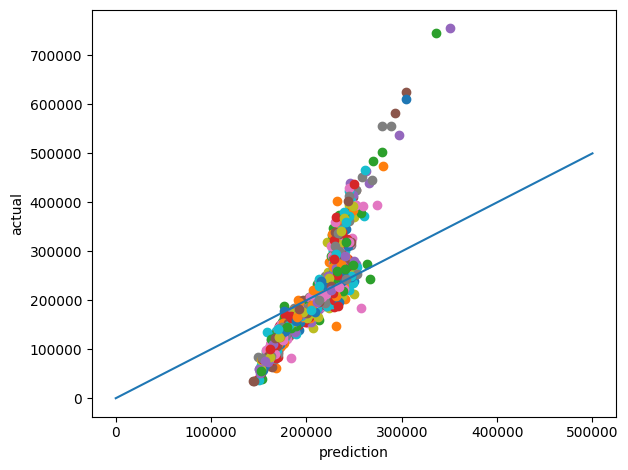

In [20]:
mse_l = []
plt.plot([0,500000],[0,500000])
count = 0
for i in range(len(real_pred)):
    plt.scatter(real_pred[i], real_actual[i])
    mse_l.append((real_pred[i] - real_actual[i])**2)
    if(np.abs(real_pred[i] - real_actual[i]) / real_actual[i] < 0.05):
        count +=1

mse = np.array(mse_l)
mse = np.sum(mse)/len(actual)
mean  = np.mean(actual)
ratio = np.sqrt(mse) / mean
print(f" 실제 값 오차 : {np.sqrt(mse):.2f} \n 평균 오차 :  {ratio * 100:.2f}% ")
print(f" 5퍼센트 오차 비율 : {count/len(actual)*100}%")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.tight_layout()
plt.show()

In [ ]:
    mse_l.append((real_pred[i] - real_actual[i])**2)
    if(np.abs(real_pred[i] - real_actual[i]) / real_actual[i] < 0.05):
        count +=1

mse = np.array(mse_l)
mse = np.sum(mse)/len(actual)
mean  = np.mean(actual)
ratio = np.sqrt(mse) / mean
print(f" 실제 값 오차 : {np.sqrt(mse):.2f} \n 평균 오차 :  {ratio * 100:.2f}% ")
print(f" 5퍼센트 오차 비율 : {count/len(actual)*100}%")
plt.xlabel('prediction')
plt.ylabel('actual')
plt.tight_layout()
plt.show()